In [1]:
library(dplyr)
library(ggplot2)
library("RColorBrewer")
source("../Scripts/visulizations.r")
source("summarize_functions.r")
source("../Scripts/functions.R")



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
celltypes = c("Cytotoxic T cell", "CD4+ T cell", "CD14+ monocyte", "B cell", "Megakaryocyte",
              "Natural killer cell",
              "CD16+ monocyte", "Dendritic cell", "Plasmacytoid dendritic cell")
methods <- c("Seurat",  "SingleR","CellID", "SingleCellNet")  
colors <-brewer.pal(length(celltypes), "Paired")
names(colors) <- celltypes

In [4]:
measures <- read.csv("../Results/Files/values_geneset.csv", sep=",")
head(measures[measures$class == "B cell",], 20)

,X,class,reference,method,size,set,genes,precision,recall,f1,accuracy
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
17,17,B cell,PBMC10x,CellID,3090,0,1000,1.0000000,0.009544787,0.018909091,0.009544787
18,18,B cell,PBMC10x,Seurat,3090,0,1000,0.9766284,0.935756241,0.955755531,0.935756241
19,19,B cell,PBMC10x,SingleCellNet,3090,0,1000,0.9315903,0.954845815,0.943074692,0.954845815
20,20,B cell,PBMC10x,SingleR,3090,0,1000,0.9592361,0.958883994,0.959060033,0.958883994
53,53,B cell,PBMC10x,CellID,3090,0,200,0.7982629,0.742290749,0.769260034,0.742290749
54,54,B cell,PBMC10x,Seurat,3090,0,200,0.9070175,0.948972100,0.927520632,0.948972100
55,55,B cell,PBMC10x,SingleCellNet,3090,0,200,0.9224806,0.917400881,0.919933738,0.917400881
56,56,B cell,PBMC10x,SingleR,3090,0,200,0.9142091,0.876284875,0.894845361,0.876284875
89,89,B cell,PBMC10x,CellID,3090,0,2000,1.0000000,0.001468429,0.002932551,0.001468429


[1] 1000  200 2000

Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


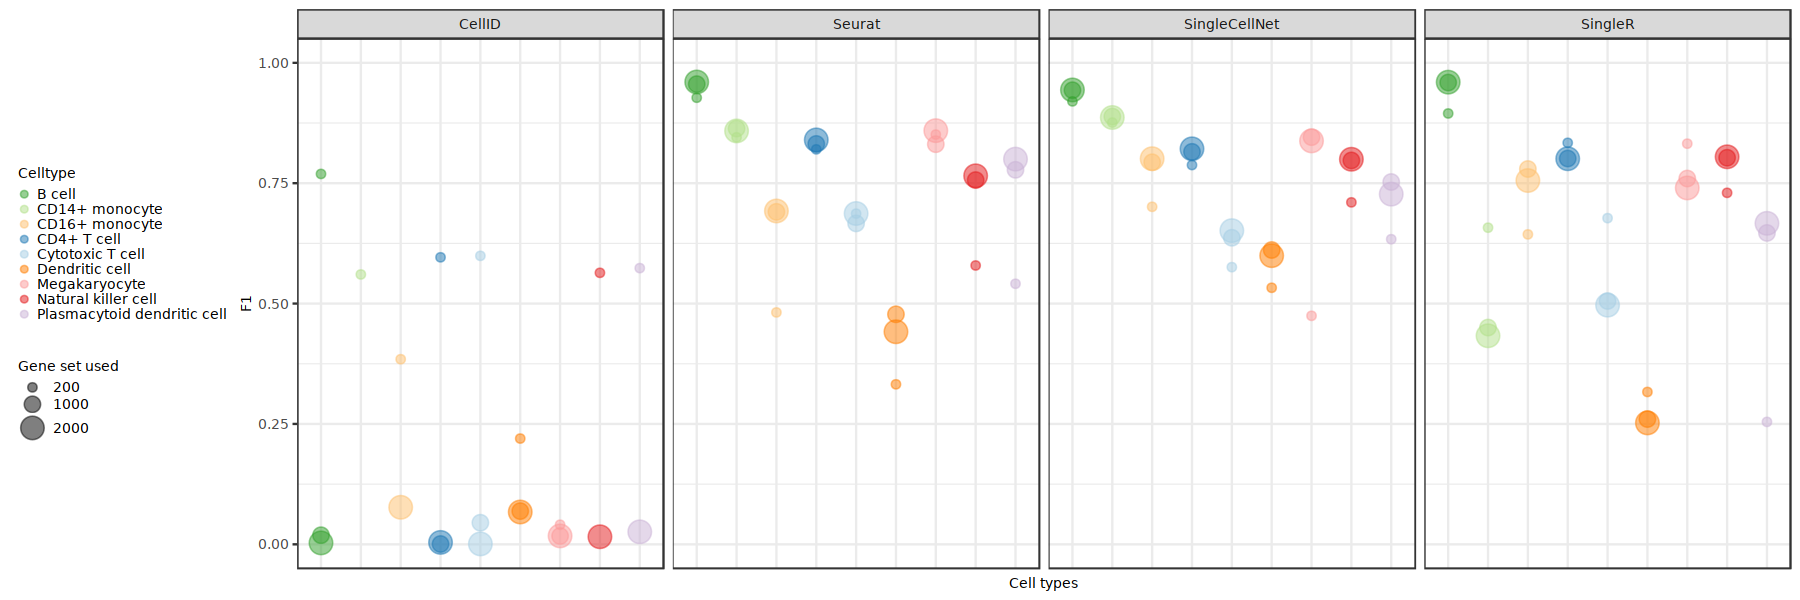

In [6]:
options(repr.plot.width=15, repr.plot.height=5) 
unique(measures$genes)


f5 <- get_plot_comparison(measures, "F1", colors)
f5

In [7]:

ggsave(
  "../Results/Figures/F5_PBMC_genesets.jpg",
  plot = f5,
  device = "jpg",
  path = NULL,
  scale = 1,
  width = 180,
  height = 80,
  units = "mm",
  dpi = 300,
  limitsize = TRUE,
  bg = "white"
)

Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


In [12]:
measures$precision[is.na(measures$precision)]<-0
measures$f1[is.na(measures$f1)]<-0

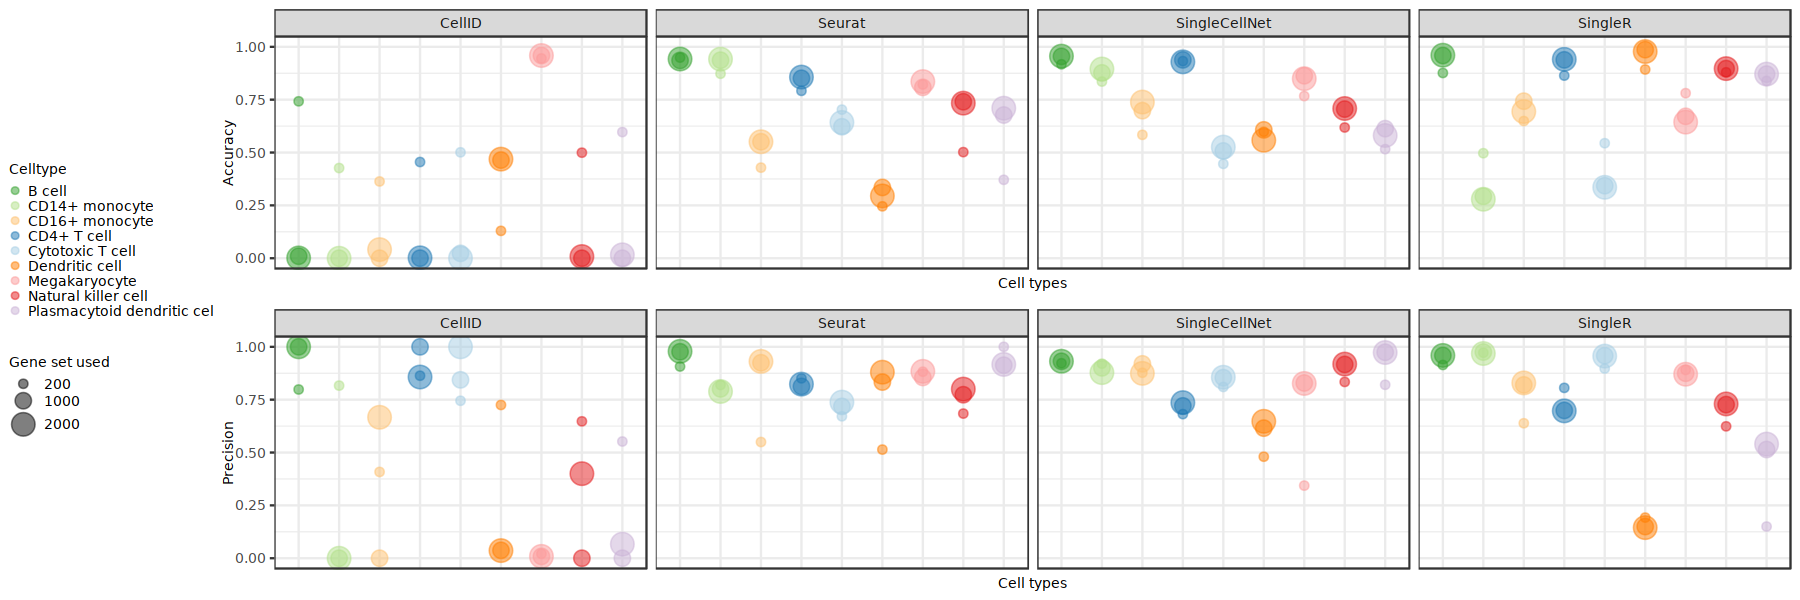

In [13]:
s6a <- get_plot_comparison(measures, "Accuracy", colors)
s6b <- get_plot_comparison(measures, "Precision", colors)
s6 <- ggpubr::ggarrange(s6a, s6b,  nrow=2, ncol=1, common.legend=T, legend="left")
s6

In [14]:
ggsave(
  "../Results/Figures/S6_PBMC_genesets.jpg",
  plot = s6,
  device = "jpg",
  path = NULL,
  scale = 1,
  width = 180,
  height = 80,
  units = "mm",
  dpi = 300,
  limitsize = TRUE,
  bg = "white"
)